# **K-means with R (Iris dataset)**
## Created by **Ramses Alexander Coraspe Valdez**
## Created on July 10, 2020

> 1. Define the value of K
> 2. Choose K random centroids
> 3. Assign data to centroids based on Euclidean distance
> 4. Move the K centroids to the Geometric center of their points
> 5. Repeat from point 3

In [14]:
install.packages("tidyverse")
install.packages("cluster")
install.packages("factoextra")
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering algorithms & visualization


# library(NbClust)
# wssplot(iris_3, nc=30, seed=1234)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘viridis’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [16]:
data("iris")
df <- iris
# checking the firt 10 rows of the data
head(df, n = 10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [ ]:
#is there missing values? uncomment if it is needed
#df <- na.omit(df)

#is there missing values? uncomment if so.
#df <- scale(df)

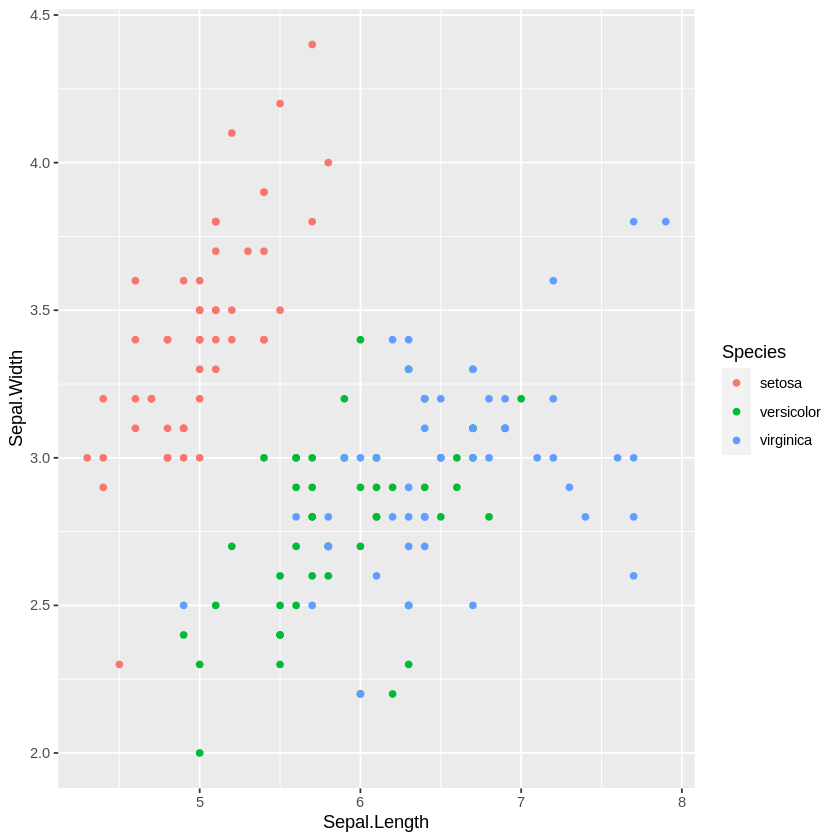

In [67]:
library(ggplot2)

ggplot(df, aes(x = Sepal.Length, y = Sepal.Width, color = Species)) +
    geom_point()   

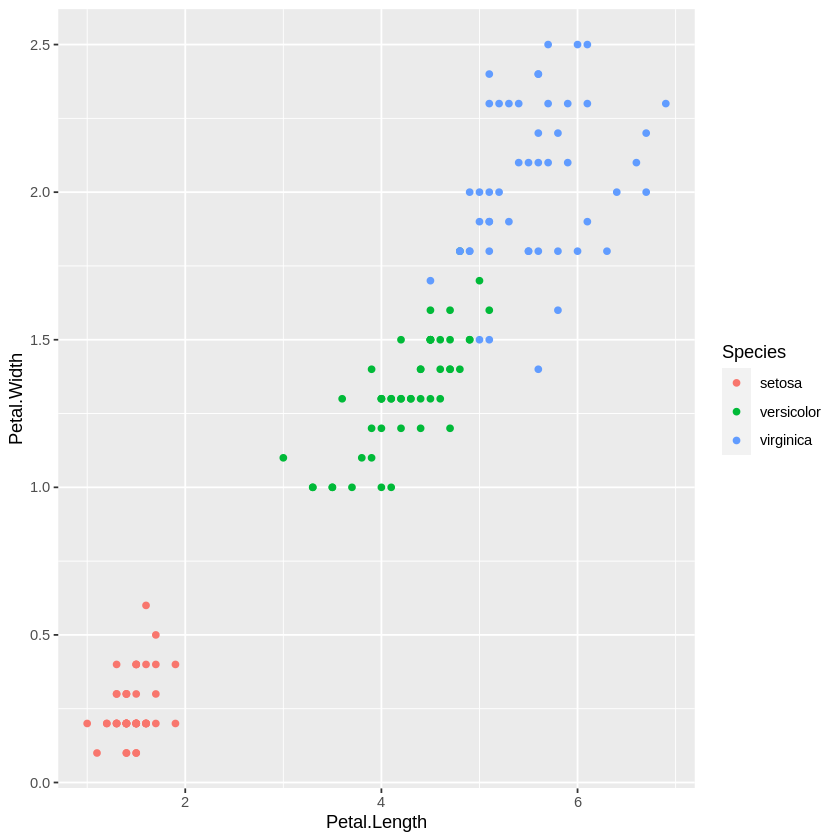

In [68]:
ggplot(df, aes(x = Petal.Length, y = Petal.Width, color = Species)) +
    geom_point()

# **Clustering**

**Euclidean distance:**

![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Feature%20scaling/euc.PNG)

In [ ]:
df2 <- df[,c("Sepal.Length","Sepal.Width", 
                   "Petal.Length", "Petal.Width")]

## **This visual method is telling us where the groupings are, but it still doesn't telling us what the optimal number of groups is.**

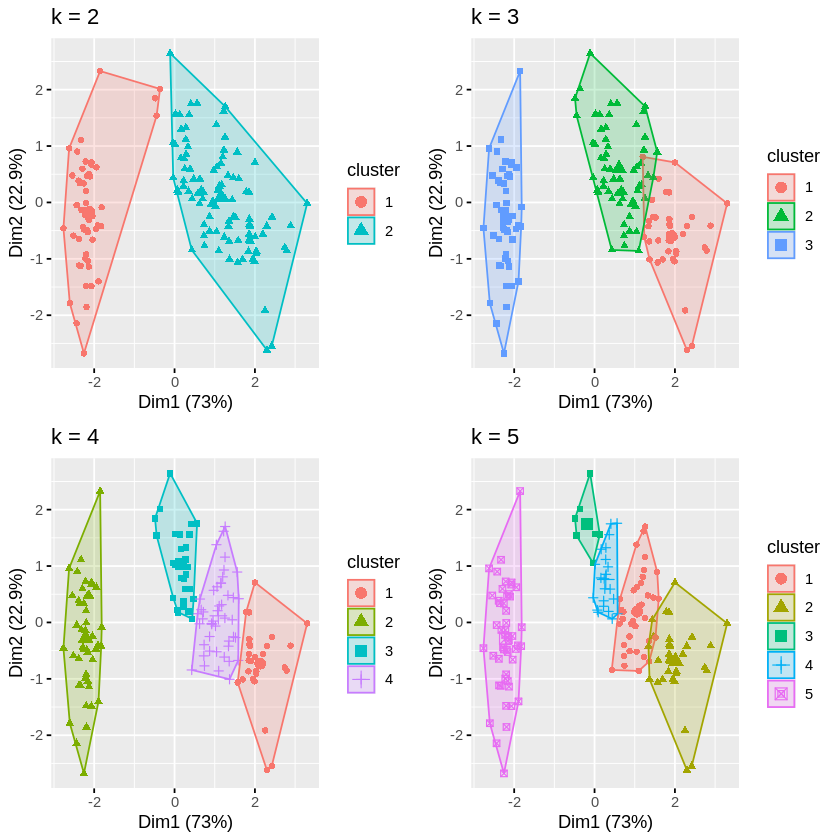

In [69]:
set.seed(123)

k2 <- kmeans(df2, centers = 2, iter.max = 25, nstart = 1)
k3 <- kmeans(df2, centers = 3, iter.max = 25, nstart = 1)
k4 <- kmeans(df2, centers = 4, iter.max = 25, nstart = 1)
k5 <- kmeans(df2, centers = 5, iter.max = 25, nstart = 1)

# plots to compare
p1 <- fviz_cluster(k2, geom = "point", data = df2) + ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point",  data = df2) + ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point",  data = df2) + ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point",  data = df2) + ggtitle("k = 5")

library(gridExtra)
grid.arrange(p1, p2, p3, p4, nrow = 2)

## **Elbow Method:** The location of the elbow in the plot the appropriate number of clusters.

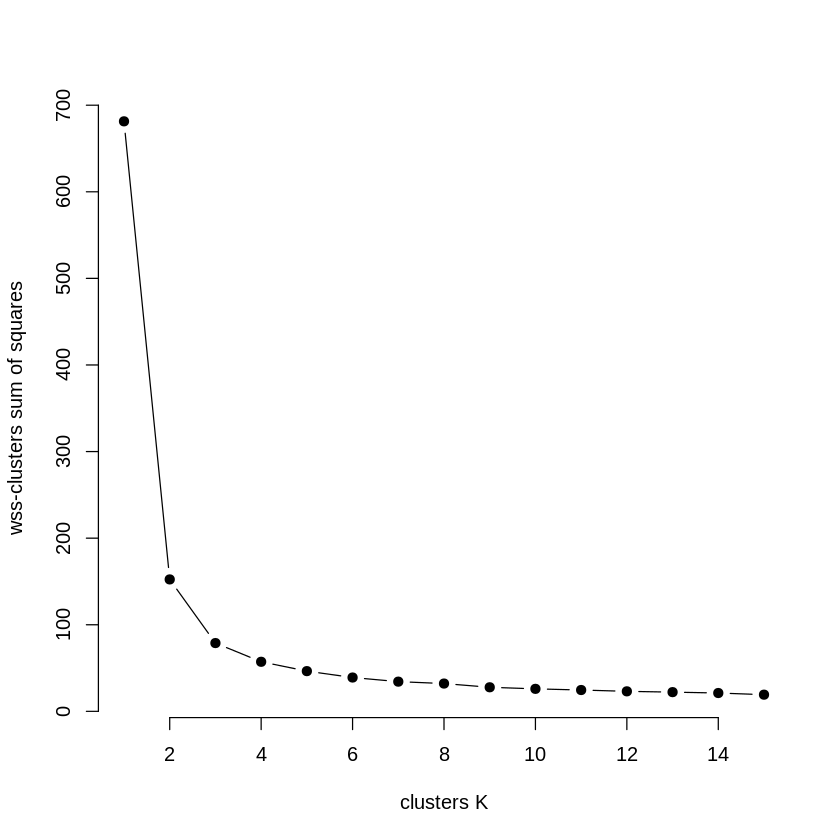

In [70]:
set.seed(123)

#compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(df2, k, nstart = 10 )$tot.withinss
}

#wss for k = 1 to k = 15
k.values <- 1:15

# wss for 2-15 clusters
wss_values <- map_dbl(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="clusters K",
       ylab="wss-clusters sum of squares")


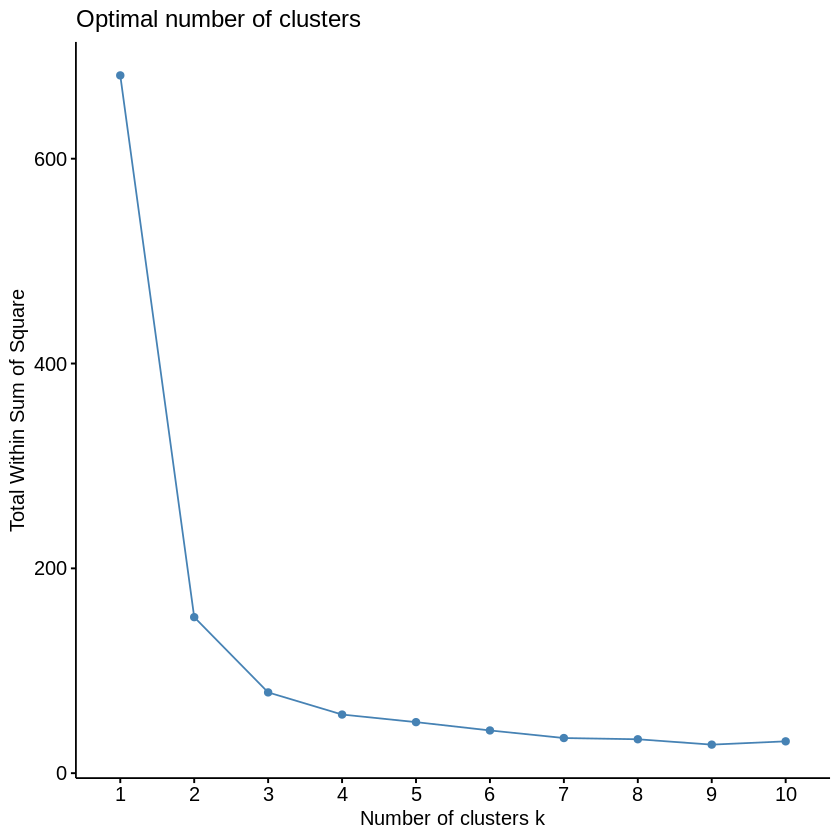

In [60]:
set.seed(123)
fviz_nbclust(df2, kmeans, method = "wss")

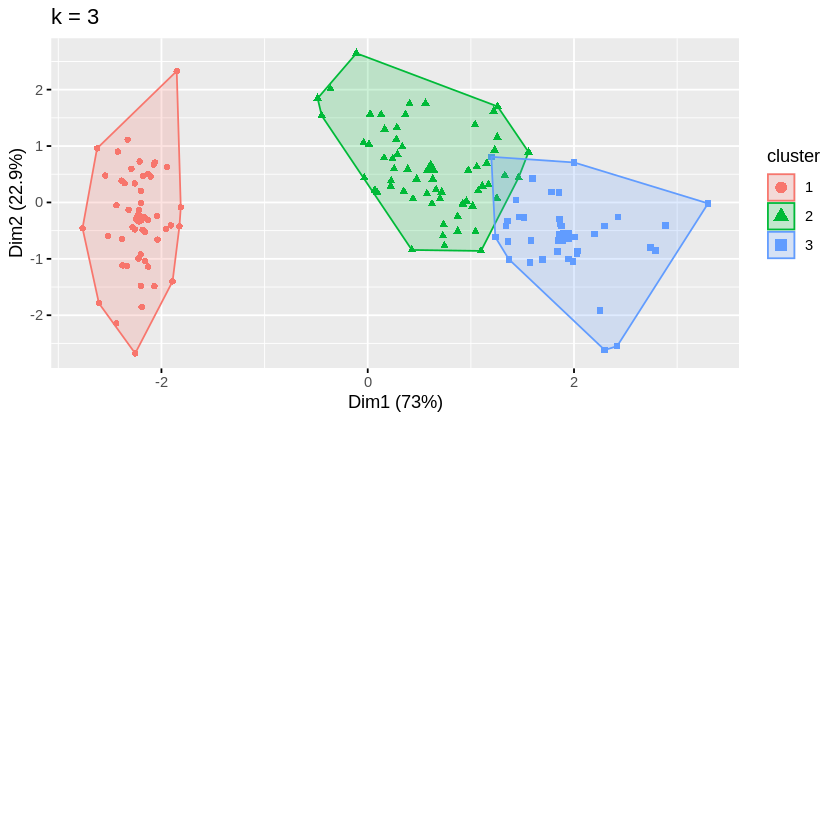

In [71]:
set.seed(123)

k3 <- kmeans(df2, centers = 3, iter.max = 25, nstart = 1)

p3 <- fviz_cluster(k3, geom = "point",  data = df2) + ggtitle("k = 3")

library(gridExtra)
grid.arrange(p3, nrow = 2)